<a href="https://colab.research.google.com/github/LCCAbraham/ICD-2023/blob/main/4%20-%20Feature%20selection%20%26%20extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abraham Cisneros Valladolid

#Práctica 2
La segunda práctica consiste en seleccionar un Dataset de interés (se puede elegir el dataset de la práctica 1), y aplicar al menos tres técnicas de los siguientes tipos de procesamiento:


*   Limpieza de datos
*   Aumento de datos
*   Extracción de características
*   Reducción de dimensionalidad
*   Selección de características

Por ejemplo, eliminación de datos incompletos (limpieza de datos), PCA (reducción de dimensionalidad), y ganancia de información (selección de atributos). Sobra decir que se requiere realizar un análisis exploratorio de los datos.

##El dataset usado será el mismo que se uso anteriormente en la práctica 1, por lo que adjunto el link de esta dataset al igual que la práctica pasada.

Dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download



Practica 1: https://github.com/LCCAbraham/ICD-2023/blob/main/1%20-%20Visualizacion%20de%20datos.ipynb



#Cargar el dataset

In [34]:
import pandas as pd
url="https://drive.google.com/file/d/1SVKAru_l2DK4C5f25kAukP71gWFKKjQC/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,standard,none,69,75,78
1,female,group B,some high school,free/reduced,none,18,32,28
2,female,group C,some high school,standard,none,69,73,73
3,female,group D,some high school,free/reduced,none,50,64,59
4,female,group C,some high school,free/reduced,completed,71,84,87


#Exploración de datos
Debido a que se está usando el mismo dataset que la vez pasada, omitiré esta parte, pues este trabajo ya fue realizado.

#Preprocesamiento - Transformar datos categoricos a numericos

Para poder aplicar métodos de feature selection y feautre extraction es necesario tener la mayoría de los atributos en forma numérica.

Empezaremos con el atributo "gender" el cual puede ser representado por uno binario por cada valor.

Lo mismo va a aplicar para "test preparation course" y "lunch"

##Las variables fueron transformadas de la siguiente manera:
Gender: male:     0 | female: 1

Lunch:  free/red: 0 | standard: 1

Test:   none:     0 | completed: 1

In [35]:
#Para cada atributo con valores nominales no oridanles, los podemos transformar
#a numericos
df["gender"] = df["gender"].map({"male": 0, "female": 1})
df["lunch"] = df["lunch"].map({"free/reduced": 0, "standard": 1})
df["test preparation course"] = df["test preparation course"].map({"none": 0, "completed": 1})

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group C,some high school,1,0,69,75,78
1,1,group B,some high school,0,0,18,32,28
2,1,group C,some high school,1,0,69,73,73
3,1,group D,some high school,0,0,50,64,59
4,1,group C,some high school,0,1,71,84,87
...,...,...,...,...,...,...,...,...
995,1,group E,associate's degree,1,0,68,76,67
996,0,group C,associate's degree,1,0,62,65,58
997,1,group C,associate's degree,1,0,91,95,94
998,1,group C,associate's degree,1,0,40,59,51


Para el atributo race/ethnicity, el cual tiene 4 categorias no ordinales y deseo transformlarlo a numerico, una de las mejores opciones es usar la técnica llamada **codificación one-hot**.

La codificación one-hot convierte cada categoría en una nueva columna binaria, donde cada columna representa una categoría y se utiliza un valor binario (1 o 0) para indicar si la observación pertenece o no a esa categoríam

In [36]:
#En este caso tambien tenemos valores nominales pero con más de 2 etiquetas.
df = pd.get_dummies(df, columns=["race/ethnicity"], prefix=["race/ethnicity"])
df

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,some high school,1,0,69,75,78,0,0,1,0,0
1,1,some high school,0,0,18,32,28,0,1,0,0,0
2,1,some high school,1,0,69,73,73,0,0,1,0,0
3,1,some high school,0,0,50,64,59,0,0,0,1,0
4,1,some high school,0,1,71,84,87,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,associate's degree,1,0,68,76,67,0,0,0,0,1
996,0,associate's degree,1,0,62,65,58,0,0,1,0,0
997,1,associate's degree,1,0,91,95,94,0,0,1,0,0
998,1,associate's degree,1,0,40,59,51,0,0,1,0,0


Finalmente, el atributo "parental level of education" es categorico ordinal, pues tiene un orden de importancia el titulo de estudio de los padres del estudiante, es por ello que se ordenaron por valor y se le dio un valor numerico y se remplazaron estos valores.

In [37]:
#Mapeo ordenada a númerico
mapeo_ordinal = {"master's degree" : 1,
                 "bachelor's degree" : 2,
                 "associate's degree" : 3,
                 "high school": 4,
                 "some college": 5,
                 "some high school": 6}

df["parental level of education"] = df["parental level of education"].map(mapeo_ordinal)
df

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,6,1,0,69,75,78,0,0,1,0,0
1,1,6,0,0,18,32,28,0,1,0,0,0
2,1,6,1,0,69,73,73,0,0,1,0,0
3,1,6,0,0,50,64,59,0,0,0,1,0
4,1,6,0,1,71,84,87,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3,1,0,68,76,67,0,0,0,0,1
996,0,3,1,0,62,65,58,0,0,1,0,0
997,1,3,1,0,91,95,94,0,0,1,0,0
998,1,3,1,0,40,59,51,0,0,1,0,0


#Reducción de dimensionalidad - PCA

PCA es una herramienta valiosa para simplificar y analizar conjuntos de datos, eliminando la redundancia y reduciendo la complejidad, lo que puede mejorar la eficiencia de los análisis y los modelos de aprendizaje automático.

Para ello usaron sklearn para aplicar PCA a nuestro conjunto de datos y reducirlo a 2 componentes.

In [38]:
from sklearn.decomposition import PCA

#Número de componentes
n_components = 2
#Establecemos el modelo
pca = PCA(n_components = n_components)
#Aplicamos el modelo
X_new = pca.fit_transform(df)
print(X_new)

[[-1.08835625e+01 -4.01512034e+00]
 [ 7.22402329e+01 -8.95178394e+00]
 [-6.76105004e+00 -1.11366130e+00]
 ...
 [-4.42855153e+01  1.68125472e-03]
 [ 3.06499790e+01 -1.04684644e+01]
 [-2.41493905e+00 -1.50829285e+01]]


En esta sección podemos ver como se comportan nuestro 2 componentes del PCA.

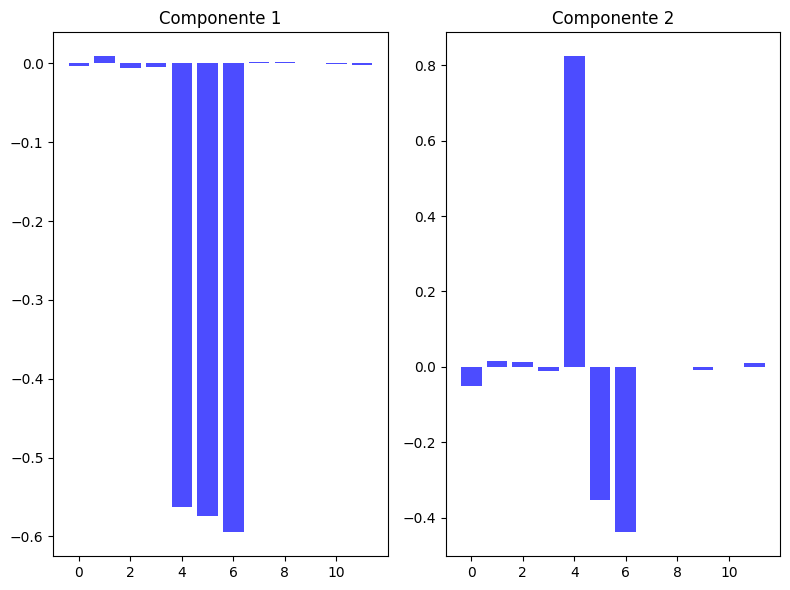

In [39]:
import matplotlib.pyplot as plt

# Obtener los componentes principales
components = pca.components_

# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
for i, component in enumerate(components):
    plt.subplot(1, n_components, i + 1)
    plt.bar(range(len(component)), component, color='b', alpha=0.7)
    plt.title(f'Componente {i + 1}')
plt.tight_layout()
plt.show()

Ahora lo podemos visualizar con un scatter plot.

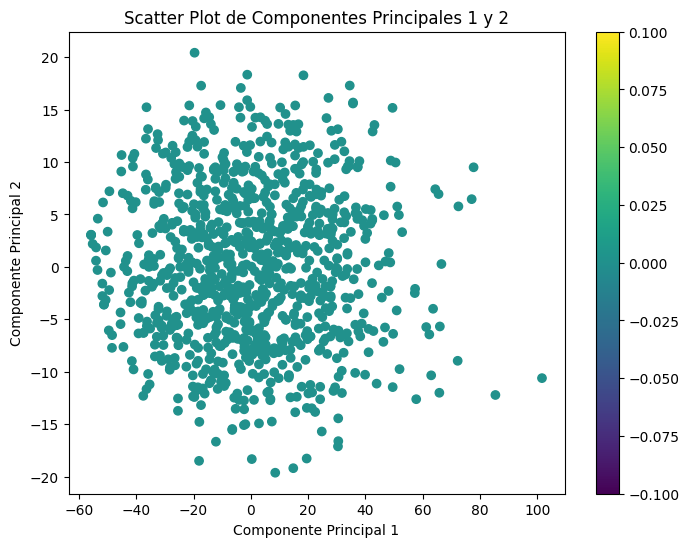

In [40]:
import matplotlib.pyplot as plt
y = [0] * len(df)
#Vizualización de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Scatter Plot de Componentes Principales 1 y 2')
plt.colorbar()
plt.show()

Al mismo tiempo, podemos ver un histograma de los datos. Donde podemos ver la distribución de todos nuestros datos.

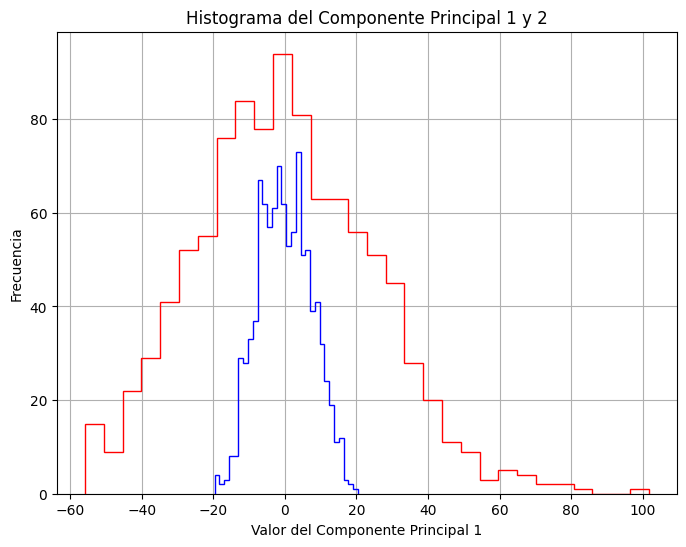

In [41]:
import matplotlib.pyplot as plt

componente_principal_1 = X_new[:, 0]
componente_principal_2 = X_new[:, 1]

# Crear un histograma para el Componente Principal 1
plt.figure(figsize=(8, 6))
plt.hist(componente_principal_1, bins=30, histtype='step', color='b', edgecolor='red')
plt.hist(componente_principal_2, bins=30, histtype='step', color='b', edgecolor='blue')
plt.xlabel('Valor del Componente Principal 1')
plt.ylabel('Frecuencia')
plt.title('Histograma del Componente Principal 1 y 2')
plt.grid(True)
plt.show()


##Conclusión de reducción de dimensionalidad.

En general, al aplicar PCA y dejar solo 2 componentes de los 8 totales, lo cual permite visualizar graficamente las instancias generadas, precisamente en el histograma podemos ver como tienen una districión cercana a la normal.

Respecto al scatterplot podemos determinar que componente 1 del PCA van desde -60 hasta el 100, mientras que el componente 2 esta entre -20 a 20. Lo cual permite que se esparzan los datos haciendolos faciles de agrupar, que precisamente es nuestra siguiente etapa.

#Feature extraction - Agrupamiento Kmeans - transformar

La aplicación de un algoritmo de agrupación como K-Means puede considerarse una técnica de feature extraction en ciertos contextos, K-Means es un algoritmo de agrupación que se utiliza principalmente para asignar puntos de datos a grupos (clusters) basados en similitudes en sus características originales. Sin embargo, se puede utilizar en combinación con otros pasos para realizar la extracción de características de manera indirecta.

Una vez que se ha aplicado K-Means y se han asignado los puntos de datos a clústeres, puedes utilizar la asignación de clústeres como una nueva característica. Esto se llama codificación de clústeres o etiquetas de clúster. En este sentido, estás extrayendo información sobre a qué clúster pertenece cada punto de datos, lo que puede ser útil como una nueva característica en lugar de las características originales.

In [47]:
#Establecemos el Kmeans
from sklearn.cluster import KMeans

#Generar modelo
kmeans = KMeans(n_clusters=3)  # Puedes ajustar el número de clusters
#Aplicar modelo
clusters = kmeans.fit_predict(X_new)

cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Una vez generado el cluster de Kmeans con 3 clusters, podemos visualizar como es que separa los datos.


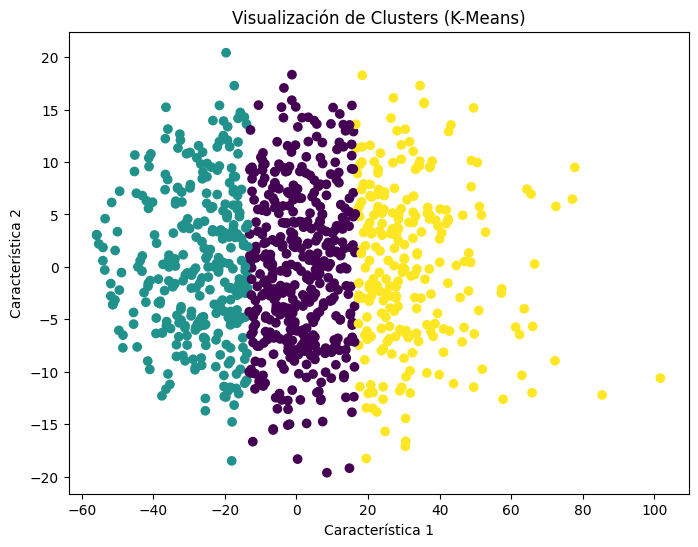

In [43]:
import matplotlib.pyplot as plt

# Visualización en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Visualización de Clusters (K-Means)')
plt.show()

Y como se mencionó anteriormente al hacer una agrupación y una separación por Kmeans
, podemos establecer etiquetas para cada uno de estos clusters
, por lo cual, estaríamos transformando agrupaciones a un nuevo atributo.


In [49]:
df["Categoria"] = cluster_labels
df

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,Categoria
0,1,6,1,0,69,75,78,0,0,1,0,0,1
1,1,6,0,0,18,32,28,0,1,0,0,0,2
2,1,6,1,0,69,73,73,0,0,1,0,0,1
3,1,6,0,0,50,64,59,0,0,0,1,0,2
4,1,6,0,1,71,84,87,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3,1,0,68,76,67,0,0,0,0,1,1
996,0,3,1,0,62,65,58,0,0,1,0,0,1
997,1,3,1,0,91,95,94,0,0,1,0,0,0
998,1,3,1,0,40,59,51,0,0,1,0,0,2


#Feature selection - recortar



La idea principal detrás de esta técnica es que las características con varianza muy baja, es decir, aquellas que apenas cambian entre las observaciones en el conjunto de datos, pueden tener poca información discriminativa y pueden no ser útiles para los modelos de aprendizaje automático.

In [50]:
from sklearn.feature_selection import VarianceThreshold

#Establecemos umbral
umbral = 0.5

#Genaramos el modelo
selector = VarianceThreshold(threshold = umbral)

#Aplicamos el modelo
X_high_variance = selector.fit_transform(df)

#Seleccionamos las caracteristicas con mejores valores
features_selected = df.columns[selector.get_support(indices=True)]

#Visualización de los atributos seleccionados
df[features_selected]

,parental level of education,math score,reading score,writing score,Categoria
0,6,69,75,78,1
1,6,18,32,28,2
2,6,69,73,73,1
3,6,50,64,59,2
4,6,71,84,87,0
...,...,...,...,...,...
995,3,68,76,67,1
996,3,62,65,58,1
997,3,91,95,94,0
998,3,40,59,51,2


Al aplicar la selección de atributos, podemos observar como se seleccionan aquellos atributos que aportan mayor información a cualquier modelo, como el nivel de educación de los padres, las calificaciones y sorprendentemente también selecciono el atributo que generamos con el Kmeans, por lo cual se retroalimenta mutuamente para confirmar su utilidad.

#Conclusión

Considero que esta práctica fue bastante provechosa tanto para mi conocimiento técnico como para el conocimiento que se puede obtener de la base de datos, pues esta no contenía suficientes datos para hacer alguna predicción con regresión con una alta confiabilidad, al mismo tiempo los datos no están etiquetados, por lo que estamos en una tarea no supervisada.

Por ello **reducir la dimensionalidad** con PCA resulta sumamente útil para visualizar los datos en dos dimensiones.

Lo cual nos permitió aplicar a estos caracteristicas PCA una agrupación con K-means para agregarles una etiqueta de clasificación, dados los clusters por lo cual estamos transformando esta información en otra más, por lo que es considerado **feature extraction**.

Finalmente, al determinar cuáles variables son las importantes (**feature selection**) usamos la técnica de varianza por umbral, lo cual nos arrojó 3 variables que ya se tenían y la categoría que le otorgo con el paso anterior. Si bien se basa en la varianza y no en datos estadísticos como otros métodos, nos resulta útil esta información al trabajar con una tarea no supervisada.

